This experiment shows controls based on states that are recorded from the physical car
We want to see why the PP works, also the PP imitator, but not the MPC (on the physical car)
Both work nicely in simulation

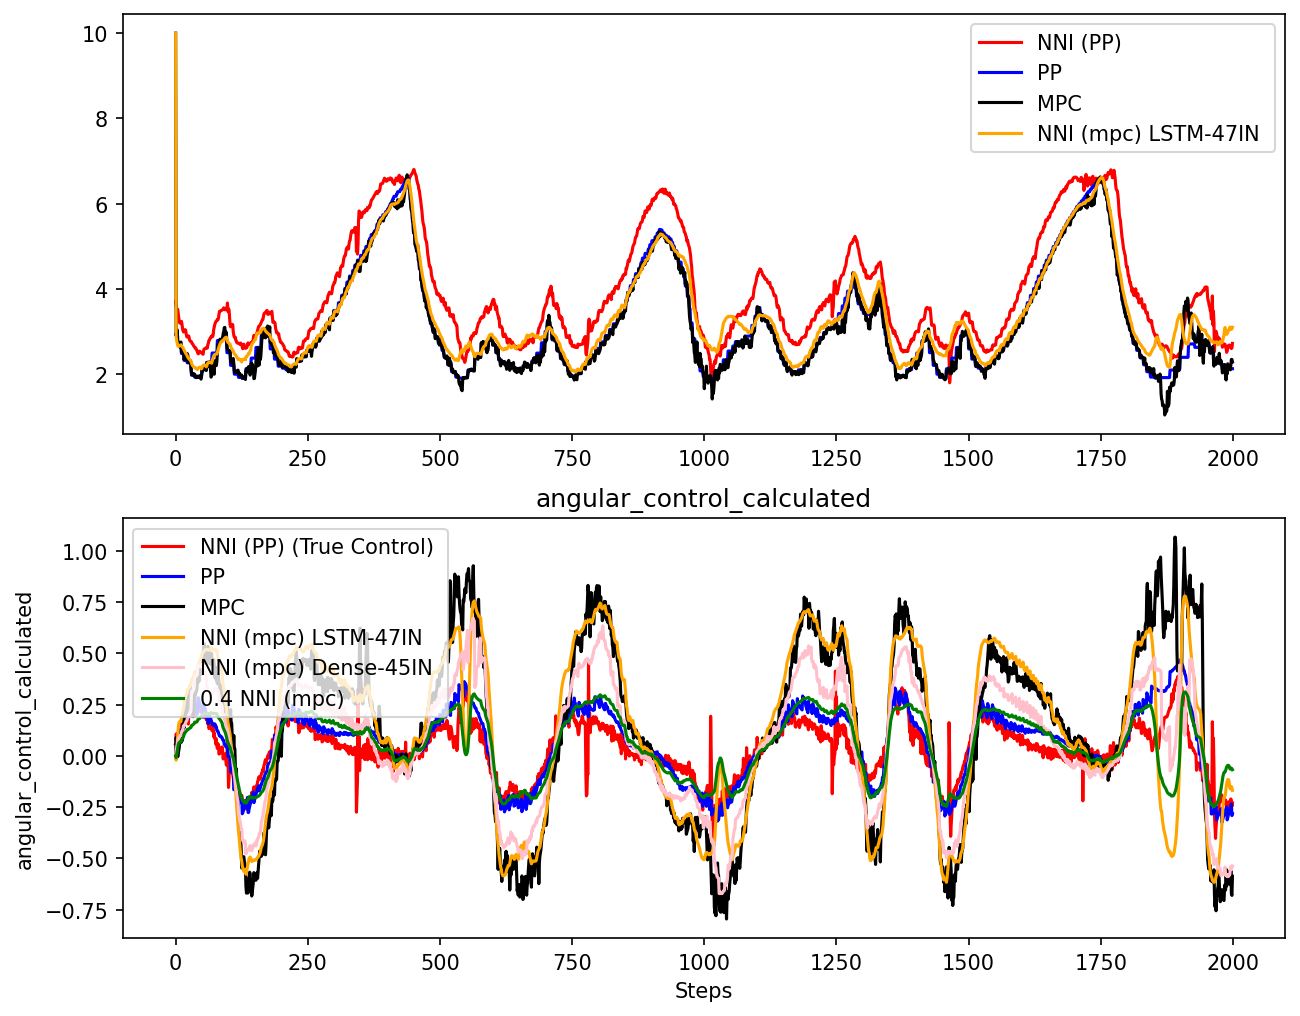

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# NN
notebook_dir = os.getcwd()

# NNI PP (actual control)
df_NN1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_ETF1_NNI__2023-11-23_15-54-27.csv', comment='#')
NN1_a = df_NN1['translational_control_calculated'][:2000]
NN1_t = df_NN1['angular_control_calculated'][:2000]

# PP SIM on physical carstate
df_pp1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_pp_50Hz__2023-12-07_17-31-41.csv', comment='#')
pp1_a= df_pp1['angular_control_calculated'][:2000]
pp1_t = df_pp1['translational_control_calculated'][:2000]

# MPC SIM on physical carstate
dp_mpc1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_mpc_50Hz__2023-12-07_17-34-05.csv', comment='#')
mpc1_a = dp_mpc1['angular_control_calculated'][:2000]
mpc1_t = dp_mpc1['translational_control_calculated'][:2000]

# NNI MPC on physical carstate
df_NN2 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_neural_50Hz__2023-12-07_17-40-45.csv', comment='#')
NN2_a = df_NN2['angular_control_calculated'][:2000]
NN2_t = df_NN2['translational_control_calculated'][:2000]

# NNI MPC on physical carstate
df_NN3 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH__2023-12-08_17-06-19_RCA1_neural_50Hz.csv', comment='#')
NN3_a = df_NN3['angular_control_calculated'][:2000]
NN3_t = df_NN3['translational_control_calculated'][:2000]


plt.figure(figsize=(10, 8), dpi=150)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot

plt.plot(NN1_t, color="red", label="NNI (PP)")
plt.plot(pp1_t, color="blue", label="PP")
plt.plot(mpc1_t, color="black", label="MPC")
plt.plot(NN2_t, color="orange",  label="NNI (mpc) LSTM-47IN ")
plt.legend()  # Add legend

plt.subplot(2, 1, 2)  # 2 rows, 1 column, first plot

plt.plot(NN1_a, color="red", label="NNI (PP) (True Control)")
plt.plot(pp1_a, color="blue", label="PP")
plt.plot(mpc1_a, color="black", label="MPC")
plt.plot(NN2_a, color="orange", label="NNI (mpc) LSTM-47IN ")
plt.plot(NN3_a, color="pink", label="NNI (mpc) Dense-45IN ")
plt.plot(0.4 * NN2_a, color="green", label="0.4 NNI (mpc)")
plt.legend()  # Add legend


plt.title('angular_control_calculated')
plt.xlabel('Steps')
plt.ylabel('angular_control_calculated')

plt.show()

The MPC as well as the MPC immitator seem to drastically oversteer
Next we're going to check if the MPC also oversteers such a lot if we drive completely in simulation (with no data from physical car)

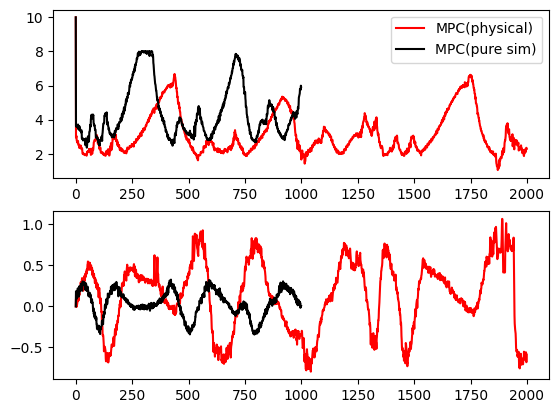

In [2]:
notebook_dir = os.getcwd()

dp_mpc_pure_sim = pd.read_csv(notebook_dir+'/PureSim/pure_sim_F1TENTH_RCA1_mpc_50Hz__2023-12-07_21-22-01.csv', comment='#')
mpc_pure_sim_a = dp_mpc_pure_sim['angular_control_calculated'][:2000]
mpc_pure_sim_t = dp_mpc_pure_sim['translational_control_calculated'][:2000]

dp_mpc_physical = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_mpc_50Hz__2023-12-07_17-34-05.csv', comment='#')
mpc_physical_a = dp_mpc_physical['angular_control_calculated'][:2000]
mpc_physical_t = dp_mpc_physical['translational_control_calculated'][:2000]


plt.clf()
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(mpc_physical_t, color="red", label="MPC(physical)")
plt.plot(mpc_pure_sim_t, color="black", label="MPC(pure sim)")
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, first plot
plt.plot(mpc_physical_a, color="red", label="MPC(physical)")
plt.plot(mpc_pure_sim_a, color="black", label="MPC(pure sim)")


MPC on the physical car seems to heavily oversteer in comparison to the simulation.... next we plot the simulation's state against the phyiscal car's one


<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

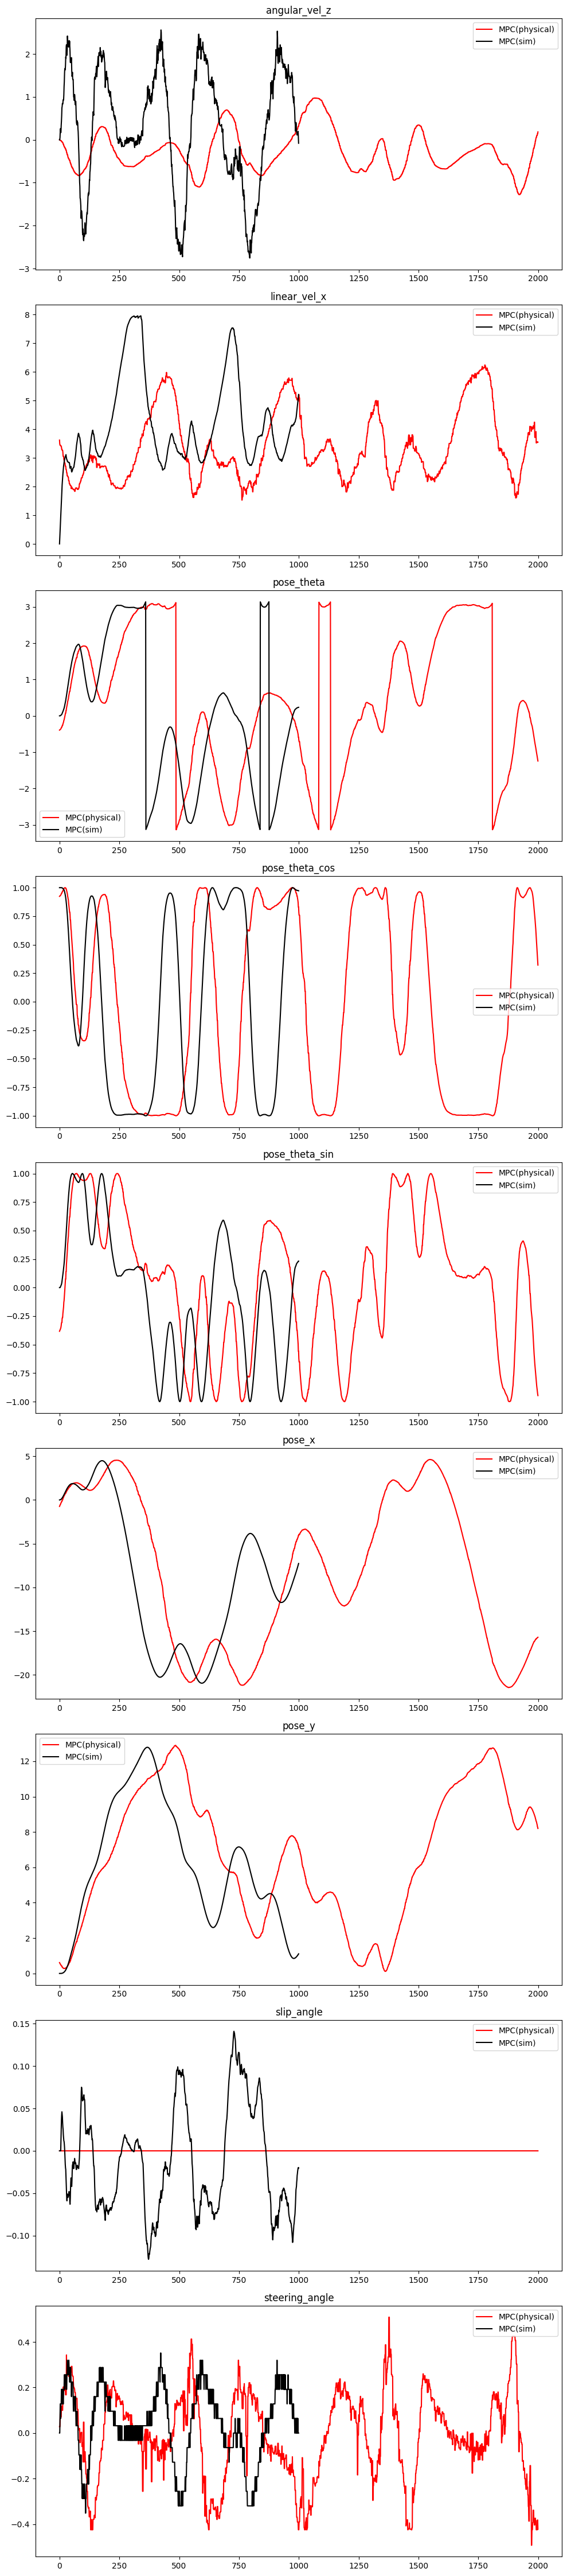

In [3]:

# car state consists of angular_vel_z,linear_vel_x,pose_theta,pose_theta_cos,pose_theta_sin,pose_x,pose_y,slip_angle,steering_angle
pure_sim_mpc = pd.read_csv(notebook_dir+'/PureSim/pure_sim_F1TENTH_RCA1_mpc_50Hz__2023-12-07_21-22-01.csv', comment='#')
dp_mpc1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_mpc_50Hz__2023-12-07_17-34-05.csv', comment='#')

# Select the first 2000 rows of the DataFrame
dp_mpc1 = dp_mpc1.iloc[:2000]
pure_sim_mpc = pure_sim_mpc.iloc[:2000]


plt.clf()
plt.figure(figsize=(10, 8), dpi=150)


# car state consists of angular_vel_z,linear_vel_x,pose_theta,pose_theta_cos,pose_theta_sin,pose_x,pose_y,slip_angle,steering_angle
pure_sim_mpc = pd.read_csv(notebook_dir+'/PureSim/pure_sim_F1TENTH_RCA1_mpc_50Hz__2023-12-07_21-22-01.csv', comment='#')
dp_mpc1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_mpc_50Hz__2023-12-07_17-34-05.csv', comment='#')

# Select the first 2000 rows of the DataFrame
dp_mpc1 = dp_mpc1.iloc[:2000]
pure_sim_mpc = pure_sim_mpc.iloc[:2000]

car_states = ['angular_vel_z','linear_vel_x','pose_theta','pose_theta_cos','pose_theta_sin','pose_x','pose_y','slip_angle','steering_angle']  # Add all your car states here

plt.figure(figsize=(10, len(car_states)*5))  # Adjust the size of the figure based on the number of subplots

for i, state in enumerate(car_states):
    plt.subplot(len(car_states), 1, i+1)
    plt.plot(dp_mpc1[state], color="red", label="MPC(physical)")
    
    # if(i == 0):
    #     plt.plot(2.5 * dp_mpc1[state], color="blue", label="2.5 * MPC(physical)")
        
    plt.plot(pure_sim_mpc[state], color="black", label="MPC(sim)")
    plt.legend()
    plt.title(state)
    
 

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

The angular velocity seems very off... we need to do something about this...

<Figure size 640x480 with 0 Axes>

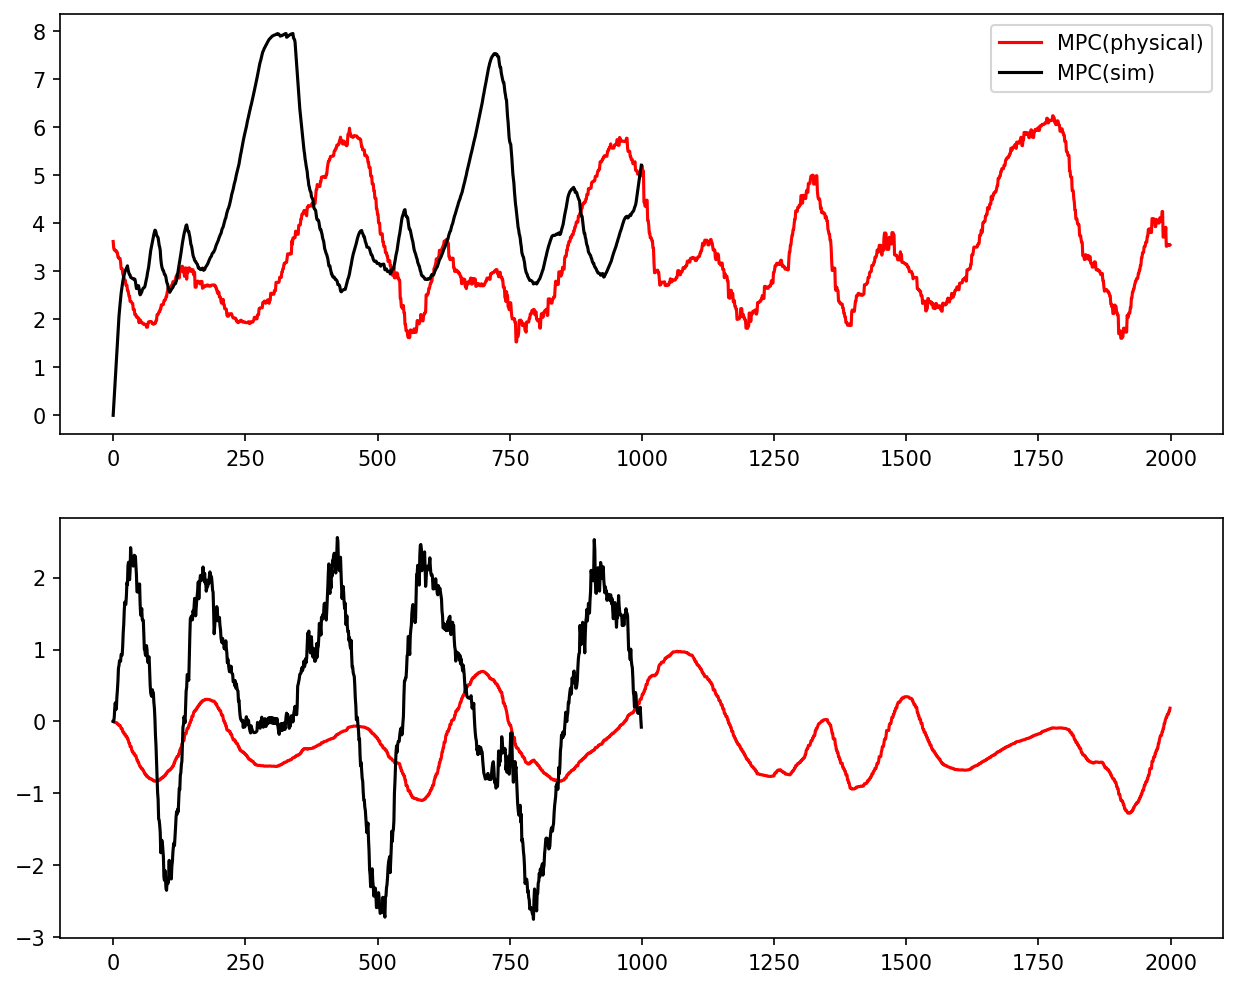

In [6]:

# car state consists of angular_vel_z,linear_vel_x,pose_theta,pose_theta_cos,pose_theta_sin,pose_x,pose_y,slip_angle,steering_angle
pure_sim_mpc = pd.read_csv(notebook_dir+'/PureSim/pure_sim_F1TENTH_RCA1_mpc_50Hz__2023-12-07_21-22-01.csv', comment='#')
dp_mpc1 = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_RCA1_mpc_50Hz__2023-12-07_17-34-05.csv', comment='#')

# Select the first 2000 rows of the DataFrame
dp_mpc1 = dp_mpc1.iloc[:2000]
pure_sim_mpc = pure_sim_mpc.iloc[:2000]


plt.clf()
plt.figure(figsize=(10, 8), dpi=150)

plt.subplot(2,1,1)
plt.plot(dp_mpc1['linear_vel_x'], color="red", label="MPC(physical)")
plt.plot(pure_sim_mpc['linear_vel_x'], color="black", label="MPC(sim)")
plt.legend()
plt.subplot(2,1,2)
plt.plot(dp_mpc1['angular_vel_z'], color="red", label="MPC(physical)")
plt.plot(pure_sim_mpc['angular_vel_z'], color="black", label="MPC(sim)")


Angular velocity seems to be very off... Not sure it is the only error

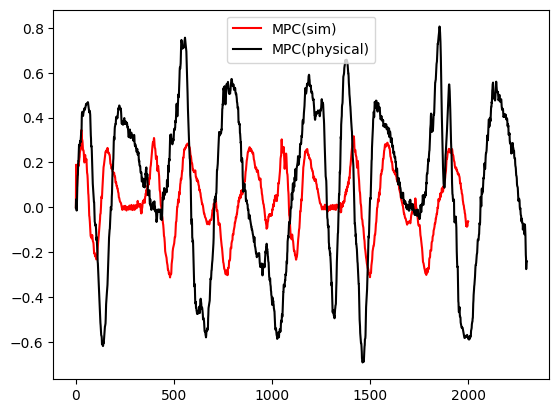

In [9]:
# The same NNI imitator ( not working on physical )
# Once purly simulated
# once simulated over physical data

pure_sim_nn = pd.read_csv(notebook_dir+'/F1TENTH_RCA1_neural_50Hz__2023-12-07_22-35-15.csv', comment='#')
physical_sim_nn = pd.read_csv(notebook_dir+'/F1TENTH_RCA1_neural_50Hz__2023-12-07_22-39-02.csv', comment='#')


plt.clf()
plt.plot(pure_sim_nn['angular_control_calculated'], color="red",label="MPC(sim)" )
plt.plot(physical_sim_nn['angular_control_calculated'], color="black", label="MPC(physical)")
plt.legend()

# still oversteering on the physical car even if it does not get info about carstate

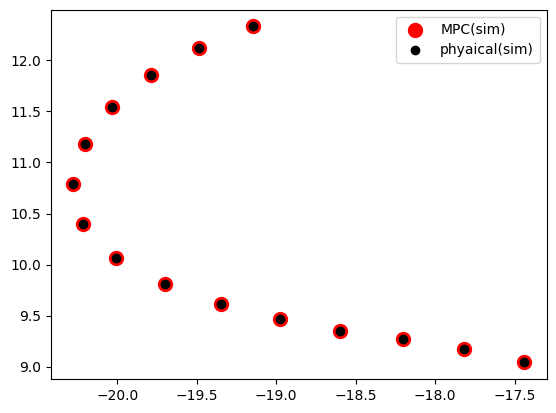

In [10]:

import matplotlib.pyplot as plt
import pandas as pd
import os
notebook_dir = os.getcwd()

pure_sim_nn = pd.read_csv(notebook_dir+'/PhysicalCarState/F1TENTH_ETF1_NNI__2023-11-23_15-54-27.csv', comment='#')
physical_sim_nn = pd.read_csv(notebook_dir+'/F1TENTH_RCA1_neural_50Hz__2023-12-07_22-39-02.csv', comment='#')


location = 500
pure_sim_nn = pure_sim_nn.iloc[location:location+1]
physical_sim_nn = physical_sim_nn.iloc[location:location+1]

keys_next_x_waypoints = ['WYPT_X_' + str(i).zfill(2) for i in range(15)]
keys_next_y_waypoints = ['WYPT_Y_' + str(i).zfill(2) for i in range(15)]
keys_next_vx_waypoints = ['WYPT_VX_' + str(i).zfill(2) for i in range(15)]

x = []
y = []
for key in keys_next_x_waypoints:
    x.append(pure_sim_nn[key]) 
    
for key in keys_next_y_waypoints:
    y.append(pure_sim_nn[key]) 
    
plt.clf()
plt.scatter(x,y, color="red",label="MPC(sim)", s=100 )


x = []
y = []
for key in keys_next_x_waypoints:
    x.append(physical_sim_nn[key]) 
    
for key in keys_next_y_waypoints:
    y.append(physical_sim_nn[key]) 
    
plt.scatter(x,y, color="black",label="phyaical(sim)" )
plt.legend()
plt.show()



The waypoints seem to be fine... there must me another problem: Delay!